Dataset Preview : 

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Importing required libraries : 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading, Reading dataset and Checking for Null Values : 

In [3]:
dataset = "Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(dataset)
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Changing text data format : 

In [5]:
df = pd.get_dummies(df, drop_first=True)

Exploratory Data Analysis : Visualizing data to understand the dataset and trends : 
( 0 = No ), (1 = Yes)

Text(0.5, 1.0, 'Churn Distribution')

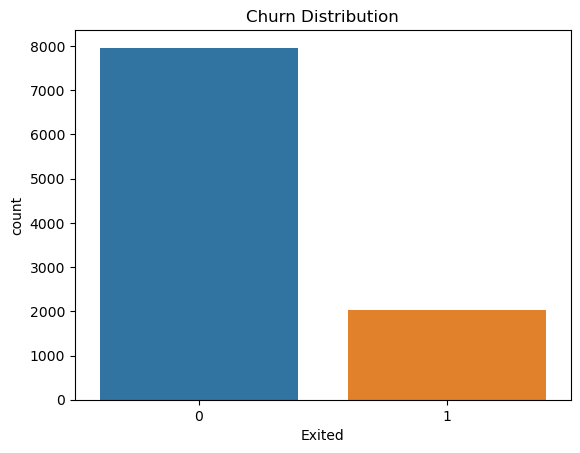

In [6]:
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")

Conclusion : This plot shows that around 8000 people have not churned and around 2000 people have churned.

Text(0.5, 1.0, 'Age vs Churn')

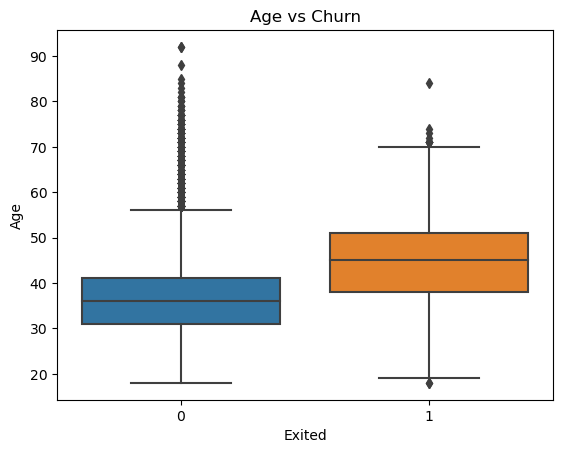

In [7]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age vs Churn") 

Conclusion : This plot shows that the median age of the customers who churn lies between 40-50 years and the median age of the
customers who don't churn lies between 30-40 years.

Feature Engineering : 
- Balance Salary Ratio
- Is High Value Customer (If balance is more than 100000)

In [8]:
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']
df['IsHighValueCustomer'] = (df['Balance'] > 100000).astype(int)

Installing scikit learn library used for training and testing datasets in machine learning : 

In [10]:
!pip install scikit-learn

Training and Testing the dataset using scikit-learn : 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Correct Random Forest configuration
model = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    min_samples_leaf=10,
    class_weight={0: 1, 1: 3},   # ✅ FIXED
    random_state=42,
    n_jobs=-1            # (optional but recommended)
)

# Train model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=10,
                       min_samples_leaf=10, n_estimators=400, n_jobs=-1,
                       random_state=42)

Visualizing the factors which are top churn drivers : 

Text(0.5, 1.0, 'Top Churn Drivers')

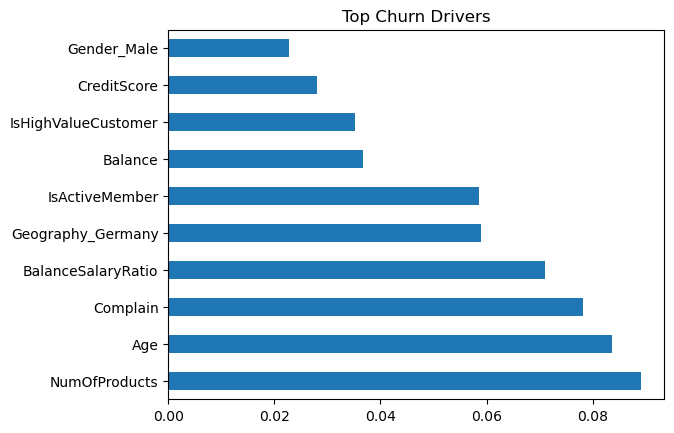

In [11]:
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importance.head(10).plot(kind='barh')
plt.title("Top Churn Drivers")

Making a folder named models : 

In [13]:
import os

os.makedirs("models", exist_ok=True)

Opening folder models and saving the model to it : 

In [14]:
import pickle

with open("models/churn_model.pkl", "wb") as f:
    pickle.dump(model, f)

Installation of streamit for web dashboard : 

In [15]:
!pip install streamlit

In [13]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

In [21]:
df.drop(columns=[
    'RowNumber',
    'Complain',
    'Satisfaction Score',
    'Card Type',
    'Point Earned'
], inplace=True)

In [24]:
X_train.dtypes

CustomerId               int64
Surname                 object
CreditScore              int64
Geography               object
Gender                  object
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
BalanceSalaryRatio     float64
IsHighValueCustomer      int32
dtype: object

In [26]:
X = df.drop(
    ['Exited', 'CustomerId', 'Surname'],
    axis=1
)
y = df['Exited']